#  Loading and Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/DATA File.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
data

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Counting missing values
missing_values = data.isnull().sum()
missing_values

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
# Identify duplicate rows
duplicates = data.duplicated()
print("Duplicate Rows:\n", data[duplicates])

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

Duplicate Rows:
 Empty DataFrame
Columns: [ID, Diagnosis, radius1, texture1, perimeter1, area1, smoothness1, compactness1, concavity1, concave_points1, symmetry1, fractal_dimension1, radius2, texture2, perimeter2, area2, smoothness2, compactness2, concavity2, concave_points2, symmetry2, fractal_dimension2, radius3, texture3, perimeter3, area3, smoothness3, compactness3, concavity3, concave_points3, symmetry3, fractal_dimension3]
Index: []

[0 rows x 32 columns]
Number of Duplicate Rows: 0


In [ ]:
# Drop 'ID' column
new_data = data.drop(['ID'], axis=1)

In [ ]:
print(new_data.describe())

          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

# Exploratory Data Analysis

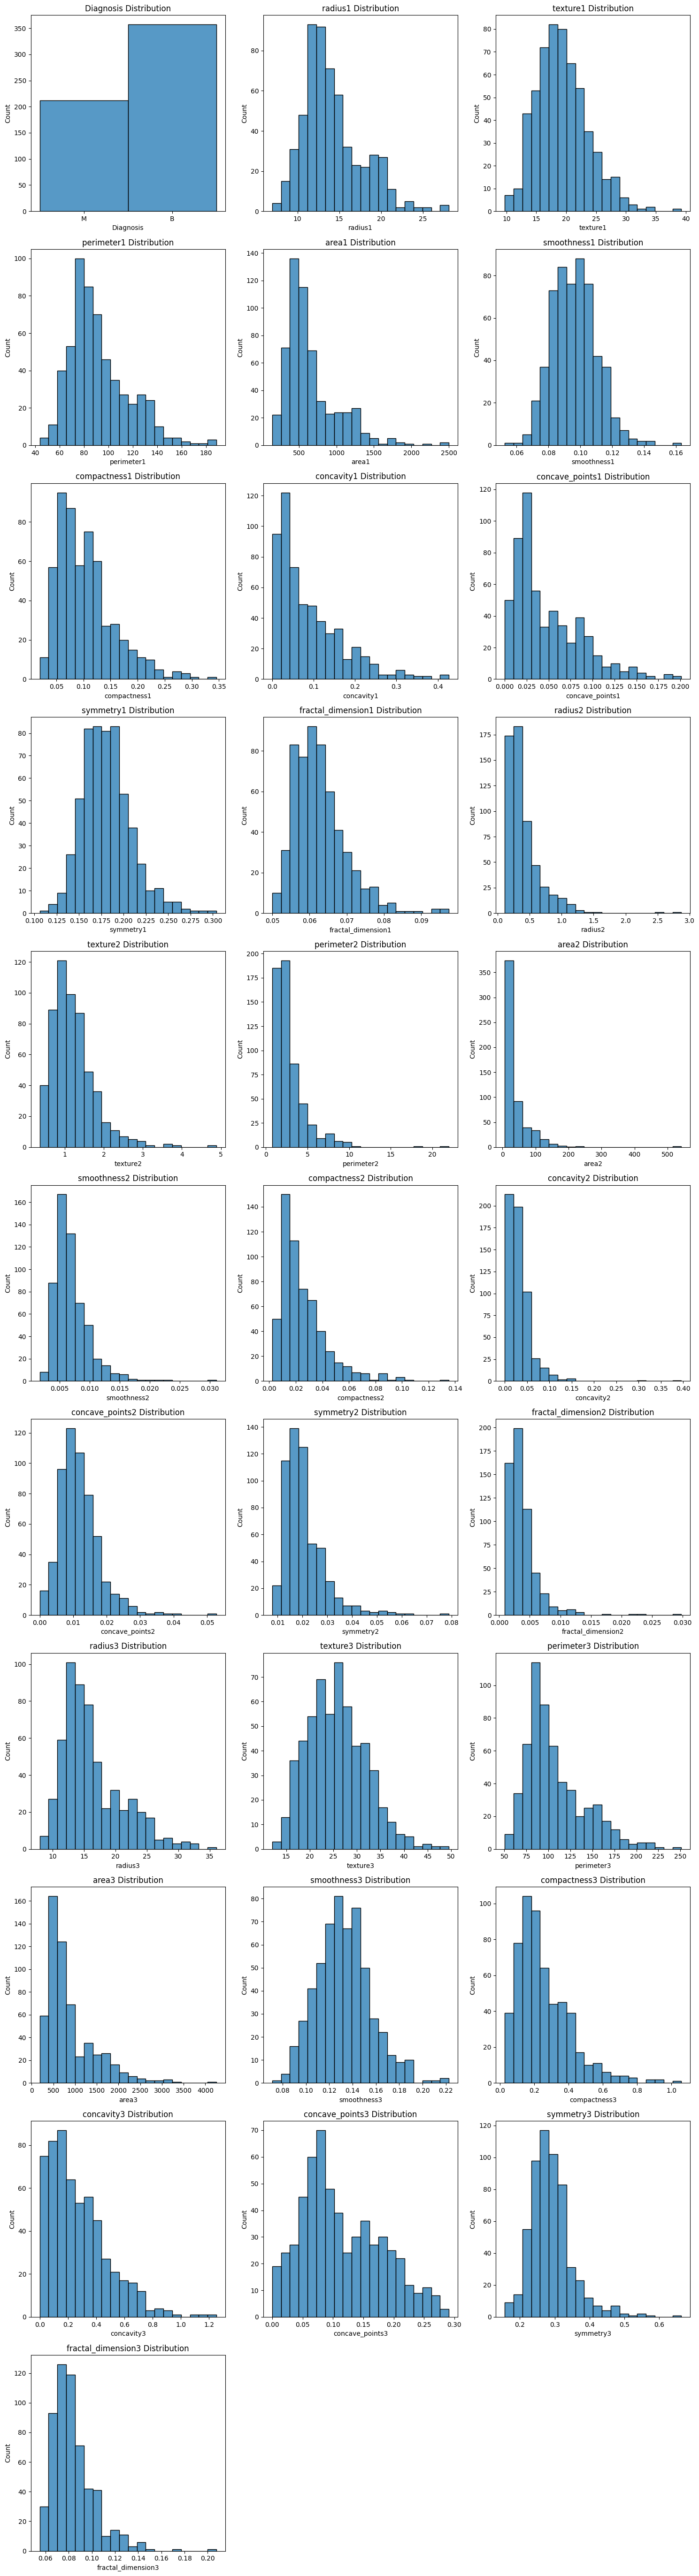

In [ ]:
# Visualization of each target and features
import math
# Number of features
num_features = len(new_data.columns)

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(num_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over each column to create histograms
for i, col in enumerate(new_data.columns):
    sns.histplot(data[col], bins=20, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df = pd.get_dummies(new_data, columns=['Diagnosis'], dtype=int)

In [ ]:
# Checking the count of the instances for each class in the target variable.
class_counts = new_data['Diagnosis'].value_counts()
print(class_counts)

Diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# Checking the count of the instances for each class in the target variable.
class_counts = new_data['Diagnosis'].value_counts()
print("Class counts:\n", class_counts)

# Calculate the ratio of the minority class to the majority class
ratio = class_counts.min() / class_counts.max()
print(f"\nRatio of minority to majority class: {ratio:.2f}")

# Determine if oversampling is needed
if ratio < 0.5:
    print("The dataset is imbalanced and may benefit from oversampling.")
else:
    print("The dataset is relatively balanced and may not need oversampling.")


Class counts:
 Diagnosis
B    357
M    212
Name: count, dtype: int64

Ratio of minority to majority class: 0.59
The dataset is relatively balanced and may not need oversampling.


In [ ]:
X = new_data.drop('Diagnosis', axis=1)
y = new_data['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Model Training and Evaluation

In [ ]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    # Set pos_label to one of your actual labels
    print('Precision:\n',metrics.precision_score(y_test,y_pred, pos_label='M')) # Change 'M' if needed
    print('Recall:\n', metrics.recall_score(y_test, y_pred, pos_label='M'))    # Change 'M' if needed

# Logistic Regression Classifier & It's ROC Curve

In [ ]:
import sklearn.metrics as metrics

lr_classifier = LogisticRegression(max_iter=1000)
desc = lr_classifier.fit(X_train , y_train)
print(desc)

y_pred = lr_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test , y_pred))

LogisticRegression(max_iter=1000)
[[74  1]
 [ 2 37]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        75
           M       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Find all unique labels in y_train
unique_labels = y_train.unique()

# Calculate class weights using the unique labels
class_weights = compute_class_weight('balanced', classes=unique_labels, y=y_train)

# Create a logistic regression classifier with class weights
lr_classifier = LogisticRegression(class_weight=dict(zip(unique_labels, class_weights)))

# Train and evaluate the model
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
print_model_performance(lr_classifier, X_test, y_test)

Accuracy score:
 0.9824561403508771
Confussion matrix:
 [[75  0]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           B     0.9740    1.0000    0.9868        75
           M     1.0000    0.9487    0.9737        39

    accuracy                         0.9825       114
   macro avg     0.9870    0.9744    0.9803       114
weighted avg     0.9829    0.9825    0.9823       114

Precision:
 1.0
Recall:
 0.9487179487179487


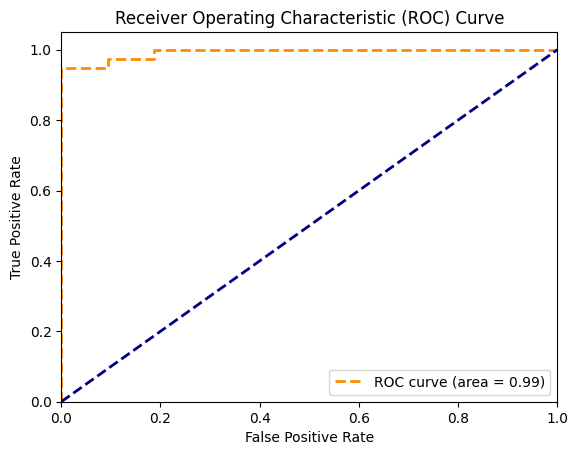

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Generate ROC curve
# Calculate the predicted probabilities for the positive class (e.g., 'M')
y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='M')
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, linestyle='--', color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC',dpi=300)
plt.show()

# Logistic Regression Classifier with Hyperparameter Tuning

In [ ]:
# Define the logistic regression classifier
lr_classifier = LogisticRegression()

# Define the values you want to search for C, penalty, and solver
lr_C = np.array([50])
lr_penalty = ['l1', 'elasticnet']  # Changed '12' to 'l1' and 'elasticnet'
lr_solver = ['lbfgs', 'liblinear', 'sag']  # Added more solver options

grid_values = {'C': lr_C, 'penalty': lr_penalty, 'solver': lr_solver}   # L1 = Lasso L2 = Ridge

# Specify the cross-validation strategy
cross_validation = KFold(n_splits=5, shuffle=False)

# Create the GridSearchCV object
lrc_grid = GridSearchCV(lr_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro')

# Fit the grid search to your training data
desc = lrc_grid.fit(X_train, y_train)

# Print the best parameters and model performance
print("\n The best parameters across all searched params:\n", lrc_grid.best_params_)
print_model_performance(lrc_grid, X_test, y_test)  # You should have a print_model_performance function defined elsewhere


 The best parameters across all searched params:
 {'C': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score:
 0.9912280701754386
Confussion matrix:
 [[75  0]
 [ 1 38]]
Classification report:
               precision    recall  f1-score   support

           B     0.9868    1.0000    0.9934        75
           M     1.0000    0.9744    0.9870        39

    accuracy                         0.9912       114
   macro avg     0.9934    0.9872    0.9902       114
weighted avg     0.9913    0.9912    0.9912       114

Precision:
 1.0
Recall:
 0.9743589743589743


# RandomForest Classifier & It's ROC Curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=44)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
print_model_performance(rf_classifier, X_test, y_test)  # Define a print_model_performance function

Accuracy score:
 0.9649122807017544
Confussion matrix:
 [[73  2]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           B     0.9733    0.9733    0.9733        75
           M     0.9487    0.9487    0.9487        39

    accuracy                         0.9649       114
   macro avg     0.9610    0.9610    0.9610       114
weighted avg     0.9649    0.9649    0.9649       114

Precision:
 0.9487179487179487
Recall:
 0.9487179487179487


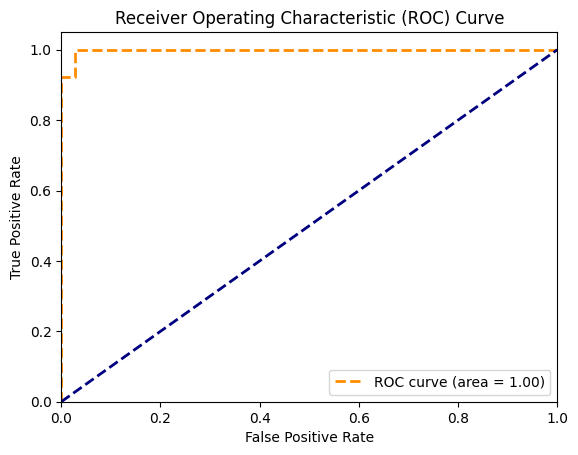

In [ ]:
# Generate the ROC curve
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='M') # Specify the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, linestyle='--', color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC',dpi=300)
plt.show()

# Support Vector Machine (SVM) Classifier & It's ROC Curve

In [ ]:
from sklearn import svm
svm_classifier = svm.SVC() #default kernal is radial basic function (RBF) kernal

desc = svm_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(svm_classifier, X_test, y_test)

SVC()
Accuracy score:
 0.956140350877193
Confussion matrix:
 [[73  2]
 [ 3 36]]
Classification report:
               precision    recall  f1-score   support

           B     0.9605    0.9733    0.9669        75
           M     0.9474    0.9231    0.9351        39

    accuracy                         0.9561       114
   macro avg     0.9539    0.9482    0.9510       114
weighted avg     0.9560    0.9561    0.9560       114

Precision:
 0.9473684210526315
Recall:
 0.9230769230769231


In [ ]:
import sklearn.metrics as metrics

for C in[1,10,100,1000,10000,100000,1000000]:
    for kernel in ['rbf','poly']:
        svm_classifier = svm.SVC(C=C, kernel=kernel) #similarly.gamma=0.01, 0.5
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'C={C:<10} kernel={kernel:<10} accuracy score={scores: .3%}')

C=1          kernel=rbf        accuracy score= 95.614%
C=1          kernel=poly       accuracy score= 94.737%
C=10         kernel=rbf        accuracy score= 97.368%
C=10         kernel=poly       accuracy score= 96.491%
C=100        kernel=rbf        accuracy score= 97.368%
C=100        kernel=poly       accuracy score= 96.491%
C=1000       kernel=rbf        accuracy score= 97.368%
C=1000       kernel=poly       accuracy score= 96.491%
C=10000      kernel=rbf        accuracy score= 97.368%
C=10000      kernel=poly       accuracy score= 98.246%
C=100000     kernel=rbf        accuracy score= 98.246%
C=100000     kernel=poly       accuracy score= 98.246%
C=1000000    kernel=rbf        accuracy score= 96.491%
C=1000000    kernel=poly       accuracy score= 97.368%


<Axes: >

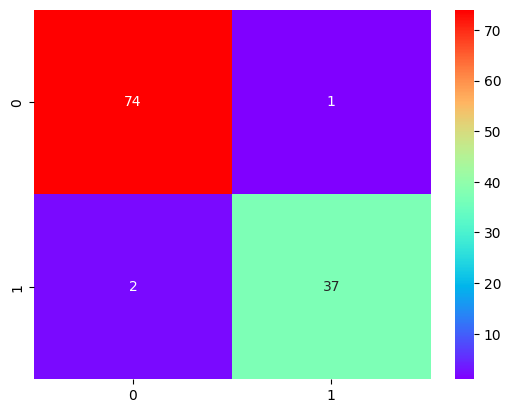

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True, fmt='d', cmap='rainbow')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001

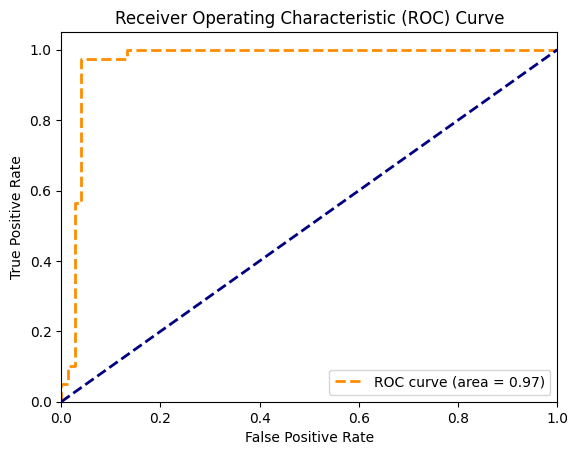

In [ ]:
# Define the SVM classifier
svm_classifier = svm.SVC(probability=True)  # Set probability=True to enable predict_proba method

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV with SVM classifier and the parameter grid
grid = GridSearchCV(svm_classifier, param_grid, refit=True, verbose=2, cv=3)

# Fit the GridSearchCV to the data
grid.fit(X_train, y_train.values.ravel())

# Print the best parameters and estimator
print(f"Best parameters: {grid.best_params_}")
print(f"Best estimator: {grid.best_estimator_}")

# Evaluate the best model found by GridSearchCV
best_model = grid.best_estimator_
print_model_performance(best_model, X_test, y_test)

# Generate the ROC curve for the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='M') # Specify 'M' as the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr,linestyle='--', color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<Axes: >

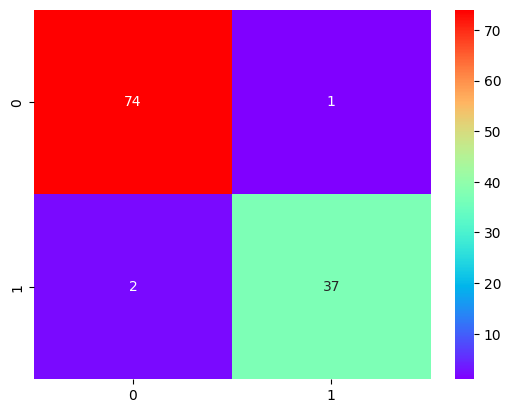

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True, fmt='d', cmap='rainbow')

# K-Nearest Neighbors Classifier & It's ROC Curve

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

desc = knn_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(knn_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)
Accuracy score:
 0.9649122807017544
Confussion matrix:
 [[73  2]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           B     0.9733    0.9733    0.9733        75
           M     0.9487    0.9487    0.9487        39

    accuracy                         0.9649       114
   macro avg     0.9610    0.9610    0.9610       114
weighted avg     0.9649    0.9649    0.9649       114

Precision:
 0.9487179487179487
Recall:
 0.9487179487179487


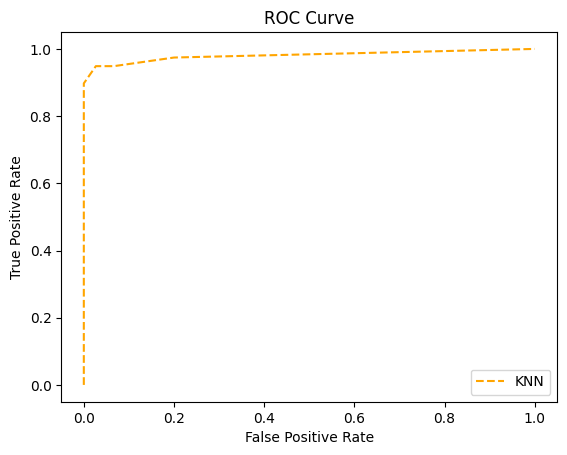

In [ ]:
# Predict probabilities
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='M') # Specify 'M' as the positive class

# Plot ROC curve
plt.plot(fpr, tpr, linestyle='--', color='orange', label='KNN')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# Decision Tree Classifier & It's ROC Curve

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion= "entropy" ,max_depth=10, random_state=44)
dt_classifier.fit(X_train,y_train)

print(dt_classifier)
print_model_performance(dt_classifier, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=44)
Accuracy score:
 0.956140350877193
Confussion matrix:
 [[72  3]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           B     0.9730    0.9600    0.9664        75
           M     0.9250    0.9487    0.9367        39

    accuracy                         0.9561       114
   macro avg     0.9490    0.9544    0.9516       114
weighted avg     0.9566    0.9561    0.9563       114

Precision:
 0.925
Recall:
 0.9487179487179487


# Hyperparameters tuning with Decision Tree

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score:
 0.9649122807017544
Confussion matrix:
 [[73  2]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           B     0.9733    0.9733    0.9733        75
           M     0.9487    0.9487    0.9487        39

    accuracy                         0.9649       114
   macro avg     0.9610    0.9610    0.9610       114
weighted avg     0.9649    0.9649    0.9649       114

Precision:
 0.9487179487179487
Recall:
 0.9487179487179487


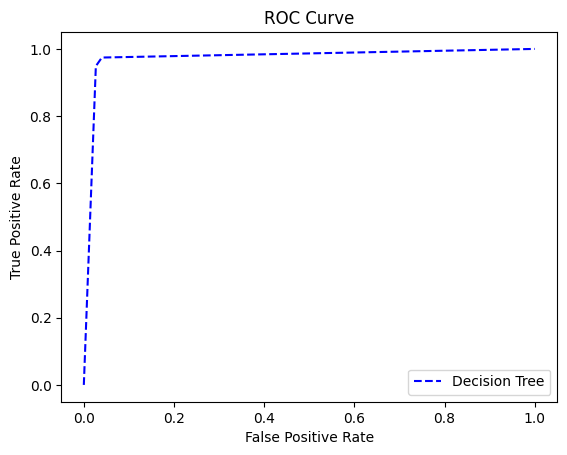

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
# Set up the parameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=44)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model
print_model_performance(best_dt_classifier, X_test, y_test)

# Plot ROC curve for the best Decision Tree classifier
y_pred_proba_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
# Specify 'M' as the positive class for roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt, pos_label='M')
plt.plot(fpr, tpr, linestyle='--', color='blue', label='Decision Tree')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC_DT', dpi=300)
plt.show()

# Visualization of the Decistion Tree

In [ ]:
from sklearn.tree import export_text

r=export_text(dt_classifier,feature_names=list(X.columns))
print(r)

|--- perimeter3 <= 114.45
|   |--- concave_points3 <= 0.11
|   |   |--- area2 <= 48.98
|   |   |   |--- texture3 <= 33.35
|   |   |   |   |--- class: B
|   |   |   |--- texture3 >  33.35
|   |   |   |   |--- concave_points3 <= 0.09
|   |   |   |   |   |--- class: B
|   |   |   |   |--- concave_points3 >  0.09
|   |   |   |   |   |--- class: M
|   |   |--- area2 >  48.98
|   |   |   |--- perimeter2 <= 4.47
|   |   |   |   |--- class: M
|   |   |   |--- perimeter2 >  4.47
|   |   |   |   |--- class: B
|   |--- concave_points3 >  0.11
|   |   |--- concave_points3 <= 0.18
|   |   |   |--- area3 <= 724.05
|   |   |   |   |--- texture3 <= 33.76
|   |   |   |   |   |--- class: B
|   |   |   |   |--- texture3 >  33.76
|   |   |   |   |   |--- class: M
|   |   |   |--- area3 >  724.05
|   |   |   |   |--- texture3 <= 20.36
|   |   |   |   |   |--- class: B
|   |   |   |   |--- texture3 >  20.36
|   |   |   |   |   |--- concave_points1 <= 0.05
|   |   |   |   |   |   |--- fractal_dimension2 <= 0